In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PATH_CALIBRE = 'c:/Users/milen/Biblioteca de calibre/'
lang = "ES"  # >>>

In [ ]:
# [print(x) for x in elige_libros_aleatorios(1)]

# 1 Selección de libros

## a) Un libro en particular

In [ ]:
one_book = True

In [ ]:
# i) por el más reciente
last, all_ = seleccion_txt(PATH_CALIBRE)
book = get_filename(last[0], True)
book

In [ ]:
# ii) alternativamente, por patrón
# pat='Huasca'#<<<<<<
# book=[get_filename(x, True) for x in all_ if pat in x][0]
# book

In [ ]:
file = [x for x in all_ if book in x]

### a.1) libros de referencia para hacer el tf-idf

In [ ]:
date_es = 20220703 if lang == 'EN' else 20200504
files_es, _ = seleccion_txt(PATH_CALIBRE, fecha=date_es)
files = file + files_es
doc_list = [txt_read(x) for x in files]

## b) De última extracción calibre

In [6]:
from utils import get_books
doc_list, files = get_books(PATH_CALIBRE)
# files

** La ultima fecha de ficheros es:  20231015
                                                    0
0     Por que mentimos_. en especial - Dan Ariely.txt
1                  Metro 2033 - Dmitry Glukhovsky.txt
2    La Araucana - Don Alonso De Ercilla y Zuniga.txt
3             Cuentos completos - Edgar Allan Poe.txt
4                        Eureka - Edgar Allan Poe.txt
5   Los crimenes de la rue Morgue - Edgar Allan Po...
6      Asi hablo Zaratustra - Friedrich Nietzsche.txt
7           Ante todo no hagas dano - Henry Marsh.txt
8                              La Iliada - Homero.txt
9                              La Odisea - Homero.txt
10               Los ninos del Brasil - Ira Levin.txt
11                       Ygdrasil - Jorge Baradit.txt
12               Don Juan Tenorio - Jose Zorrilla.txt
13    El Capital (P. Scaron) Libro te - Karl Marx.txt
14  Electrodinamica cuantica - Richard P. Feynman.txt
15       Seis piezas faciles - Richard P. Feynman.txt
16  _Que te importa lo que piensen - 

# 2 Fakes
Creación de título y autor falso

In [8]:
from utils_textmining import get_word_matrix
vector_matrix, vocab, _ = get_word_matrix(doc_list) # tfidf

c:\Users\milen\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [9]:
from utils import get_fakes
dic_fake, di_counts = get_fakes(doc_list, files, vector_matrix, vocab, lang, openAI=True)


** Iniciando: Get fakes
** Generando título con OpenAI
      Título generado:  El engaño en los experimentos sociales: dólares y trampas
  El engaño en los experimentos sociales: dólares y trampas (Por que mentimos_. en especial a no)
** Generando título con OpenAI
      Título generado:  Túnel de estaciones: El metro que miró preguntó
  Túnel de estaciones: El metro que miró preguntó (Metro 2033)
** Generando título con OpenAI
      Título generado:  Armas bárbaro: furia en el canto gratis
  Armas bárbaro: furia en el canto gratis (La Araucana)
** Generando título con OpenAI
      Título generado:  Globo en el aposento: El relato del caballero
  Globo en el aposento: El relato del caballero (Cuentos completos)
** Generando título con OpenAI
      Título generado:  La tendencia de los átomos en el universo
  La tendencia de los átomos en el universo (Eureka)
** Generando título con OpenAI
      Título generado:  Crimen francés: Voces agudas desde el cuarto piso
  Crimen francés: Voces

In [ ]:
if one_book:
    dic_fake = {0: dic_fake[0]}

In [11]:
# revisamos:
import pandas as pd
pd.DataFrame.from_dict(dic_fake)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
author,Dan Ariely,Dmitry Glukhovsky,Don Alonso De Ercilla y Zuniga,Edgar Allan Poe,Edgar Allan Poe,Edgar Allan Poe,Friedrich Nietzsche,Henry Marsh,Homero,Homero,...,Jose Zorrilla,Karl Marx,Richard P. Feynman,Richard P. Feynman,Richard P. Feynman,Rosa Montero,Sir Arthur Conan Doyle,Steven Pinker,Tim Harford,Victor Hugo
title,Por que mentimos_. en especial a no,Metro 2033,La Araucana,Cuentos completos,Eureka,Los crimenes de la rue Morgue,Asi hablo Zaratustra,Ante todo no hagas dano,La Iliada,La Odisea,...,Don Juan Tenorio,El Capital (P. Scaron) Libro tercer,Electrodinamica cuantica,Seis piezas faciles,_Que te importa lo que piensen los,Lagrimas en la lluvia,El mundo perdido (edicion ilustrada,La tabla rasa_ La negacion moderna,El economista camuflado ataca de nu,Los Miserables
fakeAuthor,Universidad David,Artyom Stalker,Araucana Zuñiga,Mr John,Madler Dios,Morgue Dupin,Véase Nietzsche,Ucrania Mike,Aquiles Héctor,Odiseo Eumeo,...,Juan Oh,Economy Smith,Fig Figura,Tierra P2,Nasa Arlene,Tierra Nopal,Londres Dios,Harris New,Gobiernos Internet,Valjean Marius
fakeTitle,El engaño en los experimentos sociales: dólare...,Túnel de estaciones: El metro que miró preguntó,Armas bárbaro: furia en el canto gratis,Globo en el aposento: El relato del caballero,La tendencia de los átomos en el universo,Crimen francés: Voces agudas desde el cuarto piso,La Caverna de la Sabiduría Habló: La Virtud de...,"Operación cerebral: Pacientes, tumor y cirugía...",Las Naves Divinas: Combate de Dioses Valientes,El Palacio de los Dioses: Oh Nave de Ánimo,...,La estatua del capitán: un lance sepulcral,Capital y renta: Los secretos de la ganancia,Flechas de cristal: Una teoría cuántica fascin...,Teoría de partículas: La energía cuántica de á...,Informe de motores: Problemas y soluciones,Móvil en pantalla: el inspector miró,El Profesor y el Señor de los Monos,La Naturaleza Humana: Una Perspectiva Social,Dólares y precios: El mercado de las ganancias,La niña respondió al anciano en la sala
path,c:/Users/milen/Biblioteca de calibre\Dan Ariel...,c:/Users/milen/Biblioteca de calibre\Dmitry Gl...,c:/Users/milen/Biblioteca de calibre\Don Alons...,c:/Users/milen/Biblioteca de calibre\Edgar All...,c:/Users/milen/Biblioteca de calibre\Edgar All...,c:/Users/milen/Biblioteca de calibre\Edgar All...,c:/Users/milen/Biblioteca de calibre\Friedrich...,c:/Users/milen/Biblioteca de calibre\Henry Mar...,c:/Users/milen/Biblioteca de calibre\Homero\La...,c:/Users/milen/Biblioteca de calibre\Homero\La...,...,c:/Users/milen/Biblioteca de calibre\Jose Zorr...,c:/Users/milen/Biblioteca de calibre\Karl Marx...,c:/Users/milen/Biblioteca de calibre\Richard P...,c:/Users/milen/Biblioteca de calibre\Richard P...,c:/Users/milen/Biblioteca de calibre\Richard P...,c:/Users/milen/Biblioteca de calibre\Rosa Mont...,c:/Users/milen/Biblioteca de calibre\Sir Arthu...,c:/Users/milen/Biblioteca de calibre\Steven Pi...,c:/Users/milen/Biblioteca de calibre\Tim Harfo...,c:/Users/milen/Biblioteca de calibre\Victor Hu...
listo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
i,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
names,"[universidad, david, eynav, journal, smorc, yo...","[artyom, melnik, kan, vdnkh, hunter, stalker, ...","[don, araucana, alonso, ercilla, zuñiga, lauta...","[mr, dios, bon, marie, dupin, júpiter, york, j...","[dios, laplace, galaxia, neptuno, eureka, kepl...","[dupin, espanaye, morgue, crímenes, edgar, all...","[véase, nietzsche, evangelio, mateo, jesús, ec...","[bueno, ucrania, londres, igor, uci, melanie, ...","[zeus, héctor, aquiles, agamenón, patroclo, ay...","[odiseo, telémaco, zeus, atenea, penelopea, re...",...,"[don, juan, dios, escena, inés, escultor, luis...","[marx, ii, londres, parís, iii, inglaterra, jo...","[fig, figura, vds, newton, x1, t1, x2, mev, t2...","[tierra, sol, luna, newton, p12, p2, p1, júpit...","[sr, nasa, arlene, rogers, 

In [12]:
from utils import SUMMARIES_JSON
from utils_base import json_update
j = {dic_fake[k]['title']: dic_fake[k] for k in dic_fake}
json_update(j, SUMMARIES_JSON)

# guardamos el json asegurando las tilde

** Creando fichero data_med/summaries.json
** Guardado los datos  en data_med/summaries.json


# 3  Get partes. Elegir

#### a) por bulk, pero uno a uno

In [13]:
i_book = 0 # << ir avanzando
file = files[i_book]
filename= file.split('\\')[-1]
filename = filename.split('.')[0]
filename = filename.split(' - ')[0]
print(filename)
texto = doc_list[i_book]

Por que mentimos_


#### b) Individual (del json)

In [ ]:
j = json_read(SUMMARIES_JSON)
titles = sorted(list(j.keys()))
titles

## 3.1 Cortar

In [15]:
from utils import get_book_datas
texto, img, titulo, d_summary = get_book_datas(filename)

Por que mentimos_. en especial a no


In [104]:
from utils import cabeza_y_cola
partes, df = cabeza_y_cola(texto, 50) # << Cuántos párrafos mostrar

,parte,len
i,,
1029,"Azim Shariff y Ara Norenzayan, «Mean Gods Make Good People: Different Views of God Predict Cheating Behavior», International Journal for the Psych...",171
1030,Lecturas relacionadas,21
1031,"Keri L., Kettle y Gerald Häubl, «The Signature Effect: How Signing One’s Name Influences Consumption-Related Behavior by Priming Self-Identity», J...",181
1032,"Deepak Malhotra, «(When) Are Religious People Nicer? Religious Salience and the ‘Sunday Effect’ on Pro-Social Behavior», Judgment and Decision Mak...",157
1033,"DAN ARIELY (n. Nueva York, Estados Unidos; 29 de abril de 1968) es un catedrático de psicología y economía conductual nacido en Estados Unidos y c...",304
1034,Además de sus escritos académicos ha publicado dos famosos libros Las trampas del deseo (2008) y Las ventajas del deseo (2010).,127
1035,Notas,5
1036,"[*] El título hace mención al título original del libro, The (honest) truth about dishonesty (La honesta verdad sobre la deshonestidad), que por r...",257
1037,[*] La avalancha de escándalos empresariales que han seguido desde entonces responde claramente a la pregunta. <<,113


,parte,len
i,,
0,"Mentimos a nivel individual y a nivel colectivo, en trivialidades y en grandes escándalos financieros, en nuestra vida cotidiana y sobre nuestro p...",450
1,"Dan Ariely se sumerge en los pliegos y claroscuros de la mente para entender qué nos hace mentir y de que forma nos protegemos de ello, respondien...",409
2,Dan Ariely,10
3,"Por qué mentimos, en especial a nosotros mismos",47
4,La ciencia del engaño puesta al descubierto,43
5,ePub r1.0,9
6,Titivillus 08.09.15,19
7,Título original: The (Honest) Truth About Dishonesty. How We Lie to Everyone— Especially Ourselves,98
8,"Dan Ariely, 2012",16


In [106]:
from utils import detecta_ini
ini = detecta_ini(texto, 50)


```44```

Parte I
43 | ¡En marcha…!...
44 | CAPÍTULO 1...
45 | Test del Modelo Simple de Crimen Racional (SMORC)...


In [116]:
from utils import detecta_fin   
fin= detecta_fin(texto, i_chunk=-1, nrow=100)

 Cogemos los índices 979 a 1078

    Te daré las primeras palabras de cada párrafo del final de un libro y sus número correlativo. 
    Quiero que me digas en qué número de párrafo empiezan secciones que no son parte de la historia.
    Las reconocerás por el título como referencias, agradecimientos, postlogo, notas, etc.
    Quiero que entregues el nombre se la sección encontrada y el número de párrafo. 
    El número debe estar entre comillas triples.
    
    Ejemplo: <titulo>, nº ```12```

    ### Párrafos finales

    979 | Walter Mischel y Ozlem Ayduk, ...
980 | Janet Polivy y C. Peter Herman...
981 | Capítulo 5. Por qué engañamos ...
982 | Basado en...
983 | Francesca Gino, Michael I. Nor...
984 | Lecturas relacionadas...
985 | Dan Ariely y Michael L. Norton...
986 | Roy F. Baumeister, Kathleen D....
987 | C. Peter Herman y Deborah Mack...
988 | Capítulo 6. Nos engañamos a no...
989 | Basado en...
990 | Zoë Chance, Michael I. Norton,...
991 | Lecturas relacionadas...
992 | Ziva 

In [118]:
# fin = 1274  # >>>
# ini = 11  # >>>
d_summary['min'], d_summary['max'] = ini, fin

In [119]:
d_summary

{'author': 'Dan Ariely',
 'title': 'Por que mentimos_. en especial a no',
 'fakeAuthor': 'Universidad David',
 'fakeTitle': 'El engaño en los experimentos sociales: dólares y trampas',
 'path': 'c:/Users/milen/Biblioteca de calibre\\Dan Ariely\\Por que mentimos_. en especial a no (217)\\Por que mentimos_. en especial - Dan Ariely.txt',
 'listo': False,
 'i': 0,
 'names': ['universidad',
  'david',
  'eynav',
  'journal',
  'smorc',
  'york',
  'gino',
  'francesca',
  'madoff',
  'jennifer',
  'mit',
  'john',
  'self',
  'nina',
  'duke',
  'harvard',
  '«the',
  'prada',
  'tali',
  'behavior',
  'enron',
  'street',
  'basado',
  'research',
  'mandamientos',
  'mazar',
  'roy',
  'california',
  'pac',
  'yale',
  'wilson',
  'israel',
  'janet',
  'mike',
  'daniel',
  'wall',
  'george',
  'princeton',
  'kubrick',
  'baumeister',
  'american',
  'shahar',
  'psychological',
  'chloé',
  'yoav',
  'peter',
  'steve',
  'max',
  'racheli',
  'nicole',
  'maurice',
  'upitt',
  'fr

In [120]:
json_update({d_summary['title']: d_summary}, SUMMARIES_JSON)

** Guardado los datos  en data_med/summaries.json


Aquí se puede saltar al 02 si solo se quiere hacer un audiobook

## Cortar

In [121]:
from utils import corta
partes, df = corta(partes, df, ini, fin)

In [122]:
df

,parte,len
0,CAPÍTULO 1,10
1,Test del Modelo Simple de Crimen Racional (SMORC),49
2,"Voy a decirlo claro. Ellos engañan. Ustedes engañan. Y sí, yo también engaño de vez en cuando.",94
3,"Como profesor universitario, intento mezclar cosas para estimular el interés de los alumnos en el material. A este fin, alguna que otra vez invito...",354
4,"En una ocasión, traje a la clase «gratis» de economía conductual a un invitado especial. Este hombre inteligente, de gran prestigio, tiene un magn...",488
...,...,...
987,"Keri L., Kettle y Gerald Häubl, «The Signature Effect: How Signing One’s Name Influences Consumption-Related Behavior by Priming Self-Identity», J...",181
988,"Deepak Malhotra, «(When) Are Religious People Nicer? Religious Salience and the ‘Sunday Effect’ on Pro-Social Behavior», Judgment and Decision Mak...",157
989,"DAN ARIELY (n. Nueva York, Estados Unidos; 29 de abril de 1968) es un catedrático de psicología y economía conductual nacido en Estados Unidos y c...",304
990,Además de sus escritos académicos ha publicado dos famosos libros Las trampas del deseo (2008) y Las ventajas del deseo (2010).,127


***** 0
******* nacc=0 nnew=10 nfut=10
***** 1
******* nacc=10 nnew=49 nfut=59
***** 2
******* nacc=59 nnew=94 nfut=153
***** 3
******* nacc=153 nnew=354 nfut=507
***caemos dentro: 507
***** 4
******* nacc=0 nnew=488 nfut=488
***caemos dentro: 488
***** 5
******* nacc=0 nnew=315 nfut=315
***caemos dentro: 315
***** 6
******* nacc=0 nnew=85 nfut=85
***** 7
******* nacc=85 nnew=192 nfut=277
***** 8
******* nacc=277 nnew=371 nfut=648
***caemos dentro: 648
***** 9
******* nacc=0 nnew=335 nfut=335
***caemos dentro: 335
***** 10
******* nacc=0 nnew=52 nfut=52
***** 11
******* nacc=52 nnew=80 nfut=132
***** 12
******* nacc=132 nnew=18 nfut=150
***** 13
******* nacc=150 nnew=151 nfut=301
***caemos dentro: 301
***** 14
******* nacc=0 nnew=32 nfut=32
***** 15
******* nacc=32 nnew=374 nfut=406
***caemos dentro: 406
***** 16
******* nacc=0 nnew=387 nfut=387
***caemos dentro: 387
***** 17
******* nacc=0 nnew=264 nfut=264
***** 18
******* nacc=264 nnew=39 nfut=303
***caemos dentro: 303
***** 19
****

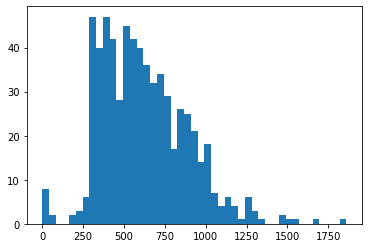

In [123]:
from utils import crea_capsulas
d_summary = crea_capsulas(partes, df, lmin=300, lmax=999)

In [304]:
from utils import Biblioteca
biblio=Biblioteca()

iteración 1
iteración 2
Hemos terminado. Hay 235 libros


In [309]:
from utils import get_next_id_available
id_free = get_next_id_available()

iteración 1
iteración 2
Hemos terminado. Hay 235 libros
El siguiente id disponible es 43


In [310]:
dic_fake[i_book]["nCapitulos"] = len(d_summary)
dic_fake[i_book]["min"] = ini
dic_fake[i_book]["max"] = fin
dic_fake[i_book]["idioma"] = lang
dic_fake[i_book]["libroId"] = id_free # libre en la base de datos

In [313]:
from utils_base import json_read,json_save
d_summaries = json_read(SUMMARIES_JSON)

In [320]:
title = dic_fake[i_book]['title']
d_summaries[title] = dic_fake[i_book]

In [315]:
json_save(d_summaries, SUMMARIES_JSON)

** Guardado los datos  en data_med/summaries.json


# Inserción por Back4app

In [317]:
i_book

0

In [319]:
d_summaries.keys()

dict_keys(['Por que mentimos_. en especial a no', 'Metro 2033', 'La Araucana', 'Cuentos completos', 'Eureka', 'Los crimenes de la rue Morgue', 'Asi hablo Zaratustra', 'Ante todo no hagas dano', 'La Iliada', 'La Odisea', 'Los ninos del Brasil', 'Ygdrasil', 'Don Juan Tenorio', 'El Capital (P. Scaron) Libro tercer', 'Electrodinamica cuantica', 'Seis piezas faciles', '_Que te importa lo que piensen los', 'Lagrimas en la lluvia', 'El mundo perdido (edicion ilustrada', 'La tabla rasa_ La negacion moderna', 'El economista camuflado ataca de nu', 'Los Miserables'])

In [322]:
d_sum=d_summaries[title]

In [323]:
d_sum.keys()

dict_keys(['author', 'title', 'fakeAuthor', 'fakeTitle', 'path', 'listo', 'i', 'names', 'idioma', 'nCapitulos', 'min', 'max', 'libroId'])

In [324]:
from utils import upload_lib_summary
upload_lib_summary(d_sum)

** Subiendo libro 43 Por que mentimos_. en especial a no
{'objectId': 'APMmqu1DXP', 'createdAt': '2023-10-16T10:59:12.821Z'}


In [321]:
print(title)
d_summaries[title]


Por que mentimos_. en especial a no


{'author': 'Dan Ariely',
 'title': 'Por que mentimos_. en especial a no',
 'fakeAuthor': 'Universidad David',
 'fakeTitle': 'El engaño en los experimentos sociales: dólares y trampas',
 'path': 'c:/Users/milen/Biblioteca de calibre\\Dan Ariely\\Por que mentimos_. en especial a no (217)\\Por que mentimos_. en especial - Dan Ariely.txt',
 'listo': False,
 'i': 0,
 'names': ['universidad',
  'david',
  'eynav',
  'journal',
  'smorc',
  'york',
  'gino',
  'francesca',
  'madoff',
  'jennifer',
  'mit',
  'john',
  'self',
  'nina',
  'duke',
  'harvard',
  '«the',
  'prada',
  'tali',
  'behavior',
  'enron',
  'street',
  'basado',
  'research',
  'mandamientos',
  'mazar',
  'roy',
  'california',
  'pac',
  'yale',
  'wilson',
  'israel',
  'janet',
  'mike',
  'daniel',
  'wall',
  'george',
  'princeton',
  'kubrick',
  'baumeister',
  'american',
  'shahar',
  'psychological',
  'chloé',
  'yoav',
  'peter',
  'steve',
  'max',
  'racheli',
  'nicole',
  'maurice',
  'upitt',
  'fr

# Inserción por mongo

In [312]:
from utils_mongo import get_db, get_colls
db = get_db()
c_lib, c_lib_sum = get_colls(db)

**test ['_User', 'librosSum', 'libros', 'diccionario', '_Role', 'objectlabs-system', 'objectlabs-system.admin.collections', '_SCHEMA', '_log']
test: nlibros sum (count) 241
test libros, example: {'_id': '00Nbe0Ey5j', 'fakeAuthor': 'Pearl Jam', 'isMusic': False, '_updated_at': datetime.datetime(2018, 7, 3, 16, 43, 10, 142000), 'author': 'Pearl Jam', '_created_at': datetime.datetime(2016, 9, 5, 11, 26, 58, 120000), 'nCapitulos': 100, 'fakeTitle': 'Best of Pearl Jam', 'title': 'Best of Pearl Jam', 'aux': 0, 'image': '6a9a6655a86a7e57cc460eac130cefab_La Cosecha del Centauro.jpg'}


In [334]:
# preparamos los json para subir masivamente
# tienen que tener los campos: texto, autor, nCapitulo, nLibro, titulo
final = []
autor = d_sum['author']
titulo = d_sum['title']
nLibro = d_sum['libroId']
for i, d_text in d_summary.items():
    d_uno = {'texto': d_text['texto'], 'autor': autor, 'nCapitulo': i, 'nLibro': nLibro, 'titulo': titulo}
    final.append(d_uno)
res = c_lib.insert_many(final)
len(res.inserted_ids)